## Feature Engineering

Feature engineering is the process of formulating the most appropriate features given the data, the
model, and the task.

In [534]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [547]:
data = pd.read_csv('data/kc_house_data.csv')

In [542]:
data.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


### Missing Value

In [543]:
#Filling all missing values with 0 / mean / median / any value
filled_data = data.fillna(0)

In [544]:
#Simply drop rows with significant amount of missing value
cleaned_data = data.dropna(axis=0, thresh=1, inplace=True)

### Outliers

In [545]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


Drop an outlier if:
   1. You know it's wrong
   2. You have a lot of data
   
Don't drop if:
   1. Your results are critical
   2. There are a lot of outliers

### Numerical Features

To decide which method to use on our numerical features we can perform sanity check:
   1. Magnitude
   2. Scale
   3. Distribution

#### Binarization

We can use Binarization to have a better representation of a feature

<AxesSubplot:>

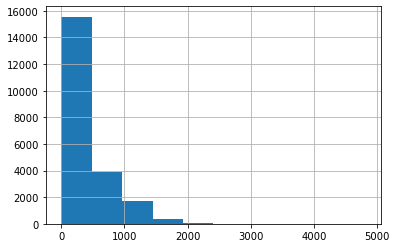

In [548]:
data['sqft_basement'].hist()

In [549]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(0)
data['has_basement'] = binarizer.fit_transform(data['sqft_basement'].values.reshape(-1,1))

In [550]:
data[['sqft_basement','has_basement']]

,sqft_basement,has_basement
0,0,0
1,400,1
2,0,0
3,910,1
4,0,0
...,...,...
21608,0,0
21609,0,0
21610,0,0
21611,0,0


#### Quantization / Binning

##### Fixed-width binning

In [385]:
# Generate 20 random int uniformly between 0 and 99
small_counts = np.random.randint(0,100,20)
small_counts

array([ 5, 21, 23, 77, 89, 43, 25,  8, 80, 76, 71, 73, 60, 95, 50, 42, 10,
       45, 48, 38])

In [386]:
# Map to 0-9 bins by division
np.floor_divide(small_counts, 10)

array([0, 2, 2, 7, 8, 4, 2, 0, 8, 7, 7, 7, 6, 9, 5, 4, 1, 4, 4, 3],
      dtype=int32)

In [387]:
# An array of counts that span several magnitudes
large_counts = [296, 8000000, 123, 23, 4, 2345, 3, 54]

In [388]:
# Map to 0-9 bins by division
np.floor_divide(large_counts, 10)

array([    29, 800000,     12,      2,      0,    234,      0,      5],
      dtype=int32)

In [389]:
np.floor(np.log10(large_counts))

array([2., 6., 2., 1., 0., 3., 0., 1.])

##### Quantile binning

Using fixed-width binning may result in empty bins with no data, in which case we can use a more adaptively positioned bins with quantile binning

In [390]:
sc = pd.read_csv('data/Cleaned Artists.csv')

In [391]:
sc[['Followers','Following']] = sc[['Followers','Following']].apply(pd.to_numeric, errors='coerce')

In [392]:
sc.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Followers,Following
count,71483.00,71483.00
mean,5603.34,380.60
std,59916.57,396.86
min,300.00,1.00
25%,632.00,119.00
50%,1311.00,250.00
75%,3246.00,485.00
max,8054886.00,2035.00


In [393]:
deciles = sc['Followers'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1     409.0
0.2     550.0
0.3     728.0
0.4     969.0
0.5    1311.0
0.6    1816.0
0.7    2635.0
0.8    4170.0
0.9    8643.6
Name: Followers, dtype: float64

Text(30.075000000000003, 0.5, 'occurence')

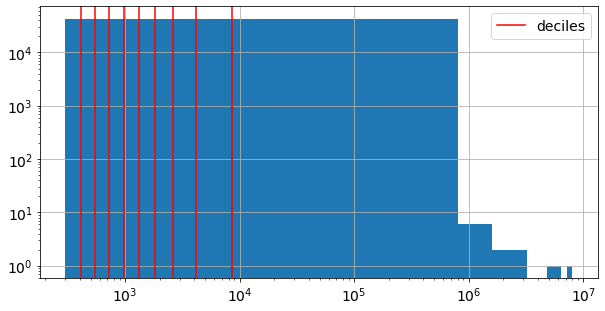

In [551]:
fig, ax = plt.subplots(figsize=(10,5))
sc['Followers'].hist(ax=ax,)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)

ax2.set_xlabel('followers', fontsize=14)
ax2.set_ylabel('occurence', fontsize=14)

#### Log Transformation

The log function compresses the range of large numbers and expands the range of small numbers. The larger x is, the slower log(x) increments.

In [508]:
sc['log_Followers'] = np.log10(sc['Followers'] + 1)

In [509]:
sc['log2_Followers'] = np.log10(sc['log_Followers'] + 1)

Text(0, 0.5, 'occurence')

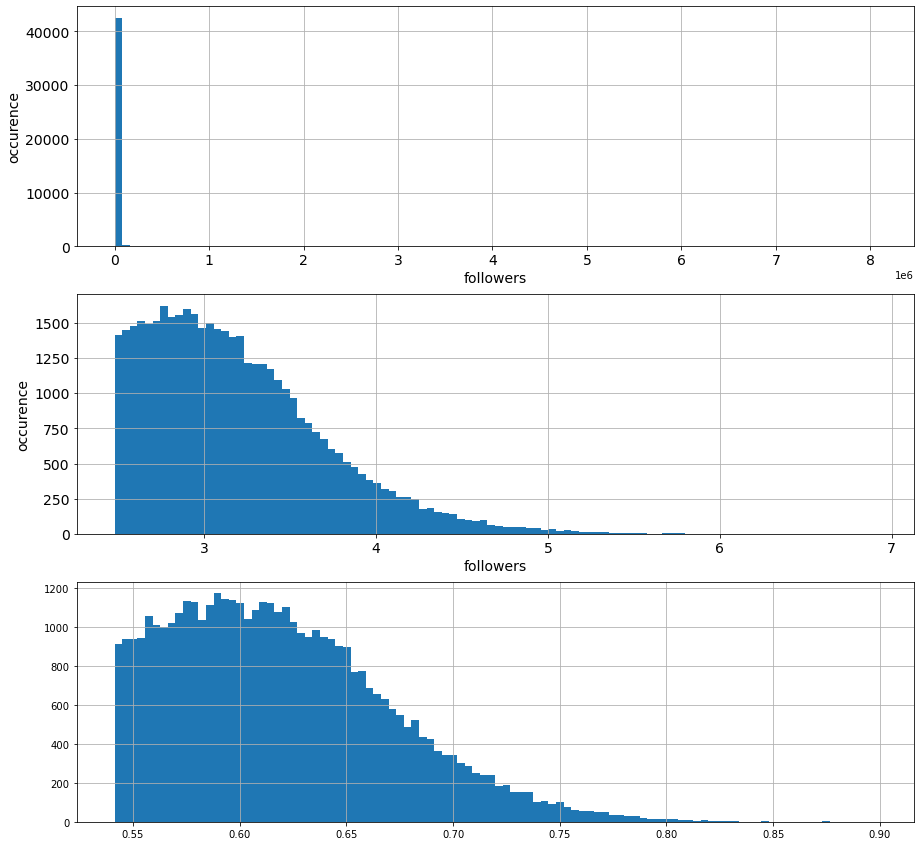

In [510]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,15))
sc['Followers'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('followers', fontsize=14)
ax1.set_ylabel('occurence', fontsize=14)

sc['log_Followers'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('followers', fontsize=14)
ax2.set_ylabel('occurence', fontsize=14)


sc['log2_Followers'].hist(ax=ax3, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('followers', fontsize=14)
ax2.set_ylabel('occurence', fontsize=14)

#### Feature Scaling

Text(63.0, 0.5, 'Occurence')

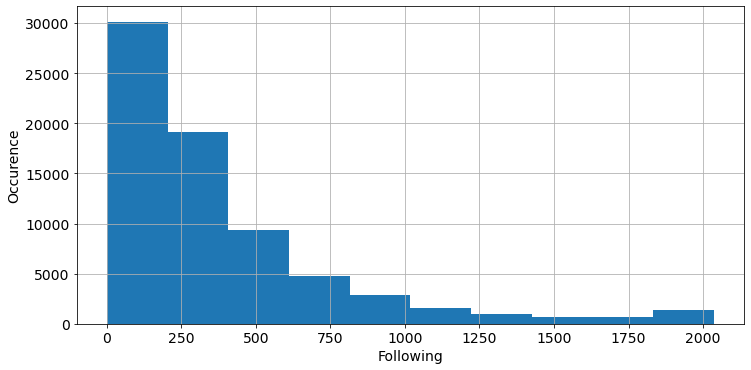

In [397]:
fig, ax = plt.subplots(figsize=(10,5))
fig.tight_layout()
sc['Following'].hist(ax=ax)
ax.tick_params(labelsize=14)
ax.set_xlabel('Following', fontsize=14)
ax.set_ylabel('Occurence', fontsize=14)

##### Min-Max Scaling
(+) Uniform features into 0 - 1 value

(-) Sensitive to outlier

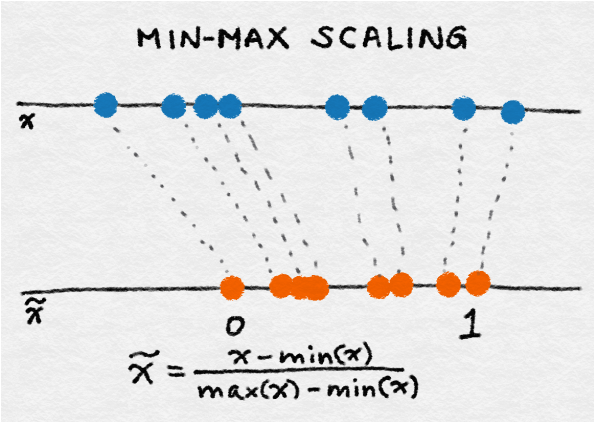

Text(63.0, 0.5, 'Occurence')

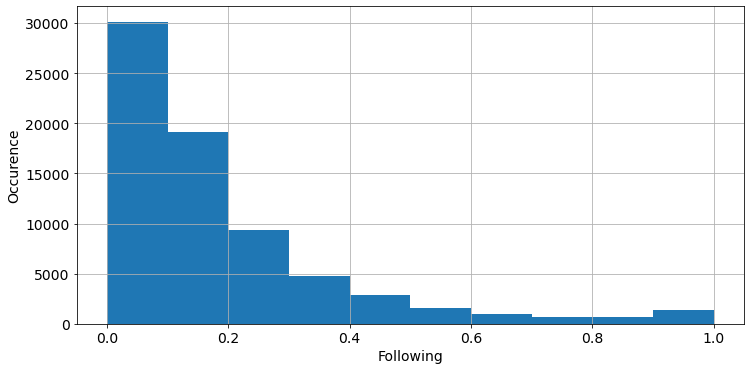

In [398]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc['minmax_Following'] = scaler.fit_transform(sc['Following'].values.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(10,5))
fig.tight_layout()
sc['minmax_Following'].hist(ax=ax)
ax.tick_params(labelsize=14)
ax.set_xlabel('Following', fontsize=14)
ax.set_ylabel('Occurence', fontsize=14)

##### Standardization

Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).

(+) Can be helpful in cases where the data follows a Gaussian distribution

(-) Sensitive to outlier

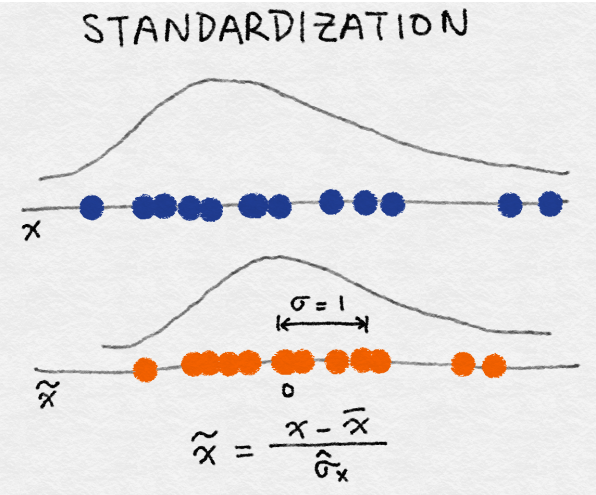

Text(63.0, 0.5, 'Occurence')

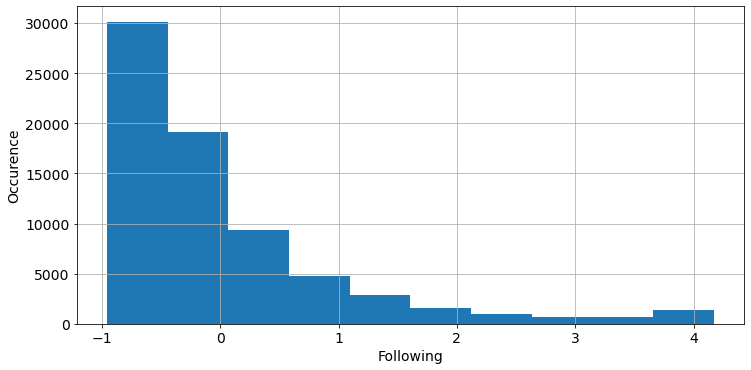

In [399]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc['std_Following'] = scaler.fit_transform(sc['Following'].values.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(10,5))
fig.tight_layout()
sc['std_Following'].hist(ax=ax)
ax.tick_params(labelsize=14)
ax.set_xlabel('Following', fontsize=14)
ax.set_ylabel('Occurence', fontsize=14)

##### $ℓ^{2}$ Normalization

Normalization is not column based but a row based normalization technique. The $ℓ^{2}$ norm sums the squares of the values of the features across data points, then
takes the square root. After $ℓ^{2}$ normalization, the feature column has norm 1. 

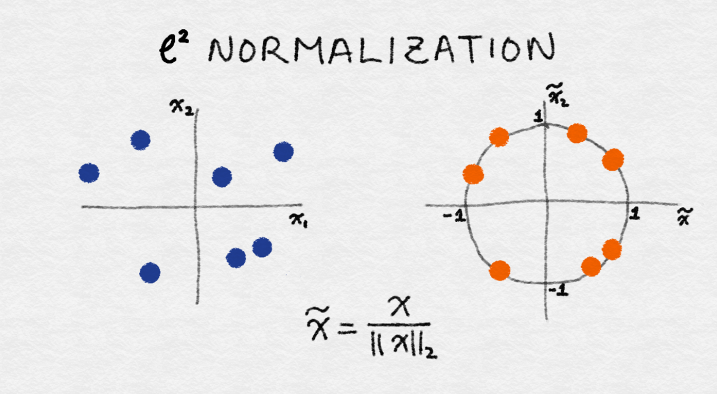

Text(63.0, 0.5, 'Occurence')

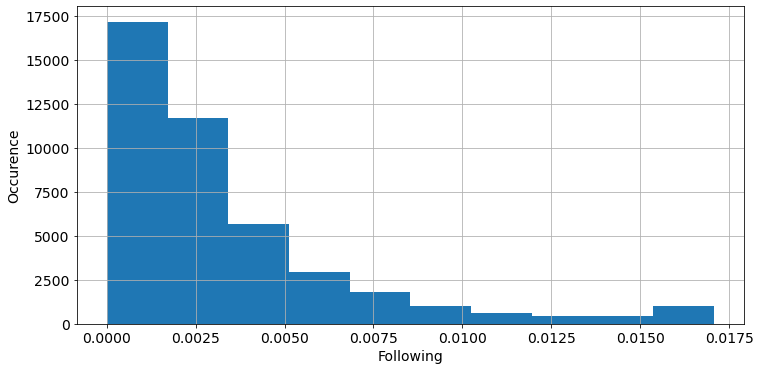

In [405]:
from sklearn.preprocessing import normalize
sc = sc.replace([np.inf, -np.inf], np.nan).dropna()
sc['l2_Following'] = normalize(sc['Following'].values.reshape(-1, 1), axis=0)

fig, ax = plt.subplots(figsize=(10,5))
fig.tight_layout()
sc['l2_Following'].hist(ax=ax)
ax.tick_params(labelsize=14)
ax.set_xlabel('Following', fontsize=14)
ax.set_ylabel('Occurence', fontsize=14)

##### RobustScaler
RobustScaler is similar to normalization but it instead uses the interquartile range, so that it is robust to outliers.

Text(63.0, 0.5, 'Occurence')

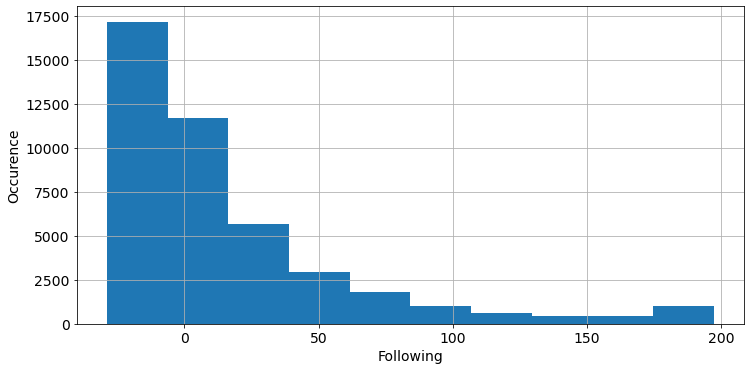

In [340]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler(quantile_range = (0.1,0.9))
sc['rob_Following'] = scaler.fit_transform(sc['Following'].values.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(10,5))
fig.tight_layout()
sc['rob_Following'].hist(ax=ax)
ax.tick_params(labelsize=14)
ax.set_xlabel('Following', fontsize=14)
ax.set_ylabel('Occurence', fontsize=14)

###### MaxAbsScaler
Standardization and MinMaxScaler substract a quantity from the original feature value. Both are not suitable for sparse data, especially when the shift is not zero, as it can turns the sparse data into dense data.

In [116]:
from sklearn.preprocessing import MaxAbsScaler
sparse = np.array([1, 5, 0, 0, 0, 2, 0, 0, 3, -5])
scaler = StandardScaler()
scaler.fit_transform(sparse.reshape(-1, 1))

array([[ 0.16275769],
       [ 1.79033461],
       [-0.24413654],
       [-0.24413654],
       [-0.24413654],
       [ 0.56965192],
       [-0.24413654],
       [-0.24413654],
       [ 0.97654615],
       [-2.27860768]])

In [513]:
scaler = MaxAbsScaler()
scaler.fit_transform(sparse.reshape(-1, 1))

array([[ 0.2],
       [ 1. ],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0.4],
       [ 0. ],
       [ 0. ],
       [ 0.6],
       [-1. ]])

#### Interaction Features

A simple pairwise interaction feature is the product of two features

In [522]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split

features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
X = data[features]
y = data[['price']]

X2 = PolynomialFeatures(include_bias=False, degree=2).fit_transform(X)
X2.shape


(21613, 104)

The features created include:

1. The bias (the value of 1.0)
2. Values raised to a power for each degree (e.g. x$^{1}$, x$^{2}$, x$^{2}$, …)
3. Interactions between all pairs of features (e.g. x1 * x2, x1 * x3, …)

For example, with two input variables with values 2 and 3 and a degree of 2, the features created would be:

1 (the bias)

2$^{1}$ = 2

3$^{1}$ = 3

2$^{2}$ = 4

3$^{2}$ = 9

2 * 3 = 6

In [523]:
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123) 

In [524]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and
    score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [525]:
# Train models and compare score on the two feature sets
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)
print("R-squared score with pairwise features: %0.5f" % r2)

R-squared score with singleton features: 0.66124
R-squared score with pairwise features: 0.72056


### Categorical Features

##### Ordinal Encoding
Ordinal features are naturally ranked, to preserve the features' value after encoding it, we want to make sure that it resembles their ranking.

In [175]:
df = pd.DataFrame({
    'temp': ['Hot', 'Cold', 'Very Hot', 'Warm', 'Warm', 'Cold',
    'Hot', 'Warm', 'Cold']
    })
temp_dict = {'Cold' : 1,
    'Warm' : 2,
    'Hot' : 3,
    'Very Hot' : 4}
df['temp_ordinal'] = df['temp'].map(temp_dict)
df

,temp,temp_ordinal
0,Hot,3
1,Cold,1
2,Very Hot,4
3,Warm,2
4,Warm,2
5,Cold,1
6,Hot,3
7,Warm,2
8,Cold,1


#### One-Hot Encoding

(+) Each feature clearly corresponds to a category

(+) Missing data can be encoded as the all-zeros vector

(-) Redundant

In [155]:
df = pd.DataFrame({
    'City': ['SF', 'SF', 'SF', 'NYC', 'NYC', 'NYC',
    'Seattle', 'Seattle', 'Seattle'],
    'Rent': [3999, 4000, 4001, 3499, 3500, 3501, 2499, 2500, 2501]
    })
df['Rent'].mean()

3333.3333333333335

In [156]:
one_hot_df = pd.get_dummies(df, prefix=['city'])
one_hot_df

,Rent,city_NYC,city_SF,city_Seattle
0,3999,0,1,0
1,4000,0,1,0
2,4001,0,1,0
3,3499,1,0,0
4,3500,1,0,0
5,3501,1,0,0
6,2499,0,0,1
7,2500,0,0,1
8,2501,0,0,1


#### Dummy Coding
(+) Not redundant

(-) all-zeros vector is used for reference category

In [157]:
dummy_df = pd.get_dummies(df, prefix=['city'], drop_first=True)
dummy_df

,Rent,city_SF,city_Seattle
0,3999,1,0
1,4000,1,0
2,4001,1,0
3,3499,0,0
4,3500,0,0
5,3501,0,0
6,2499,0,1
7,2500,0,1
8,2501,0,1


### Method Selection

In [188]:
import os
import pandas as pd
import operator

results_df = pd.read_csv("data/sonar_results.csv").dropna().round(3)
results_df

temp = results_df.loc[~results_df["Classifier_Name"].str.endswith("PCA")].dropna()
temp["model"] = results_df["Classifier_Name"].apply(lambda sen: sen.split("_")[1])
temp["scaler"] = results_df["Classifier_Name"].apply(lambda sen: sen.split("_")[0])
def df_style(val):
    return 'font-weight: 800'
pivot_t = pd.pivot_table(temp, values='CV_mean', index=["scaler"], columns=['model'], aggfunc=np.sum)
pivot_t_bold = pivot_t.style.applymap(df_style,
                      subset=pd.IndexSlice[pivot_t["CART"].idxmax(),"CART"])
for col in list(pivot_t):
    pivot_t_bold = pivot_t_bold.applymap(df_style,
                      subset=pd.IndexSlice[pivot_t[col].idxmax(),col])
pivot_t_bold

model,CART,KNN,LDA,LR,MLP,NB,RF,SVM
scaler,,,,,,,,
,0.735000,0.753000,0.699000,0.754000,0.778000,0.657000,0.710000,0.608000
MaxAbsScaler,0.735000,0.808000,0.699000,0.778000,0.767000,0.657000,0.710000,0.705000
MinMaxScaler,0.735000,0.813000,0.699000,0.778000,0.767000,0.657000,0.710000,0.711000
Normalizer,0.716000,0.765000,0.692000,0.699000,0.724000,0.662000,0.723000,0.524000
PowerTransformer-Yeo-Johnson,0.729000,0.813000,0.747000,0.760000,0.839000,0.752000,0.710000,0.814000
QuantileTransformer-Normal,0.735000,0.783000,0.694000,0.718000,0.808000,0.752000,0.717000,0.832000
QuantileTransformer-Uniform,0.740000,0.789000,0.742000,0.808000,0.808000,0.752000,0.717000,0.772000
RobustScaler,0.735000,0.760000,0.699000,0.735000,0.808000,0.657000,0.710000,0.776000
StandardScaler,0.735000,0.796000,0.699000,0.742000,0.820000,0.657000,0.710000,0.849000


### PCA

Dimensionality reduction is about getting rid of “uninformative information” while
retaining the crucial bits.

In [552]:
from sklearn.decomposition import PCA

In [553]:
from sklearn.linear_model import LogisticRegression
def evaluate_reg(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and
    score on the test set"""
    model = linear_model.LogisticRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [554]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'has_basement'],
      dtype='object')

In [555]:
# load dataset into Pandas DataFrame
data = pd.read_csv('data/spotify_wrapped.csv')
data.describe()

,Unnamed: 0,popularity,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,299.997976,72.435223,216099.831984,0.633109,0.638204,-5.997251,0.075176,0.269560,0.011528,0.489340,119.987091
std,182.795794,12.335196,42609.524023,0.140083,0.201561,2.784495,0.076741,0.291042,0.063821,0.220732,26.806521
min,0.000000,19.000000,104591.000000,0.209000,0.131000,-17.544000,0.024300,0.000106,0.000000,0.039100,52.463000
25%,133.250000,65.000000,190562.500000,0.548000,0.491000,-7.923750,0.034925,0.031200,0.000000,0.327000,99.236000
50%,301.000000,74.000000,208897.500000,0.658000,0.677500,-5.437000,0.047750,0.142000,0.000000,0.501500,120.004500
75%,470.750000,81.750000,232808.500000,0.731000,0.811750,-4.028250,0.080900,0.457500,0.000105,0.645500,135.123250
max,599.000000,96.000000,410672.000000,0.910000,0.966000,-0.836000,0.467000,0.972000,0.657000,0.964000,216.334000


In [556]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'valence', 'tempo']

X = data[features]
y = data[['popularity']]

In [560]:
X1_train, X1_test, X3_train, X3_test, y_train, y_test = train_test_split(X, X, y, test_size=0.3, random_state=123)

#Standardize and fit features
scaler = StandardScaler()
scaler.fit(X3_train)
X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)

pca = PCA(n_components=.95)
pca.fit(X3_train)
X3_train = pca.transform(X3_train)
X3_test = pca.transform(X3_test)

# Train models and compare score on the two feature sets
(m1, r1) = evaluate_reg(X1_train, X1_test, y_train, y_test)
(m2, r2) = evaluate_reg(X3_train, X3_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)
print("R-squared score with PCA features: %0.5f" % r2)

R-squared score with singleton features: 0.02685
R-squared score with PCA features: 0.06040


In [561]:
np.set_printoptions(precision=10,suppress=True)
print(abs(pca.components_))

[[0.29308596   0.4978143792 0.4715851671 0.1878622138 0.4716252954
  0.1587072278 0.3680937631 0.1596410378]
 [0.6195466831 0.1285881618 0.1180345347 0.2212658523 0.0725803624
  0.1748593218 0.3737824285 0.6009819199]
 [0.1009003227 0.0016265996 0.1748787582 0.6193961077 0.0533920644
  0.7442094572 0.0235353272 0.1353884061]
 [0.217332046  0.1867644131 0.1238839596 0.4500503823 0.0948290048
  0.1779144744 0.3479625174 0.7336683446]
 [0.2272456592 0.3102097797 0.2206286223 0.5683214964 0.2579537136
  0.5735499672 0.2479620306 0.1532257774]
 [0.5921260404 0.161185845  0.0271527452 0.0267185317 0.3044022301
  0.0931678093 0.7039364594 0.1583894782]
 [0.188192248  0.0116429651 0.685999142  0.0636162187 0.6672189122
  0.1255426256 0.1605384419 0.0556026448]]


In [562]:
print(pca.explained_variance_ratio_)

[0.3958294588 0.144854224  0.1339913328 0.1041785685 0.0965182933
 0.0625610618 0.0448526509]


##### Considerations and Limitations

1. How many principal components to use
2. Computationally expensive
3. Hard to interpret
4. Difficult to perform in streaming fashion
5. Don't apply to raw counts

## Basic Error Analysis

In real life application you will have to continuously improve your model, for instance reducing errors. Error Analysis refers to the process of examining dev set examples that your algorithm
misclassified, so that you can understand the underlying causes of the errors. 

#### Evaluating multiple ideas in parallel during error analysis
1. Take ~100 misclassified samples
2. Analyze what causes error for each and group it into error categories

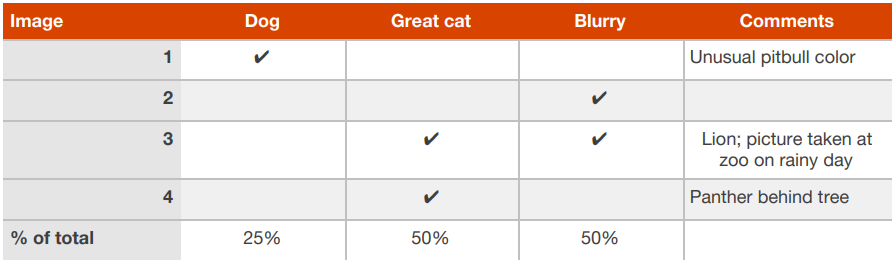

#### Cleaning up mislabeled dev and test set examples
1. Check errors due to mislabeled examples significance
2. If total error percentage significant, fix the label
3. Also double-check correctly classified labels

#### If you have a large dev set, split it into two subsets, only one of which you look at

1. Eyeball dev set : 10% portion of data you will see and improve
2. Blackbox dev set (1k - 10k examples) : evaluate by measuring error rates, fix by select among models or tune hyperparameter

### Bias and Variance

1. High Variance / Overfitting : The classifier has very low training error, but it is failing to generalize to the dev set.
2. High Bias / Underfitting : Both has poor performance, with dev error slightly higher.
3. High Bias & High Variance : It is doing poorly on the training set, and therefore has high bias, and its performance on the dev set is even worse,

#### Optimal Error Rate

You can define optimal error rate to addres unavoidable bias, especially for tasks that are not easy to perform even by human.
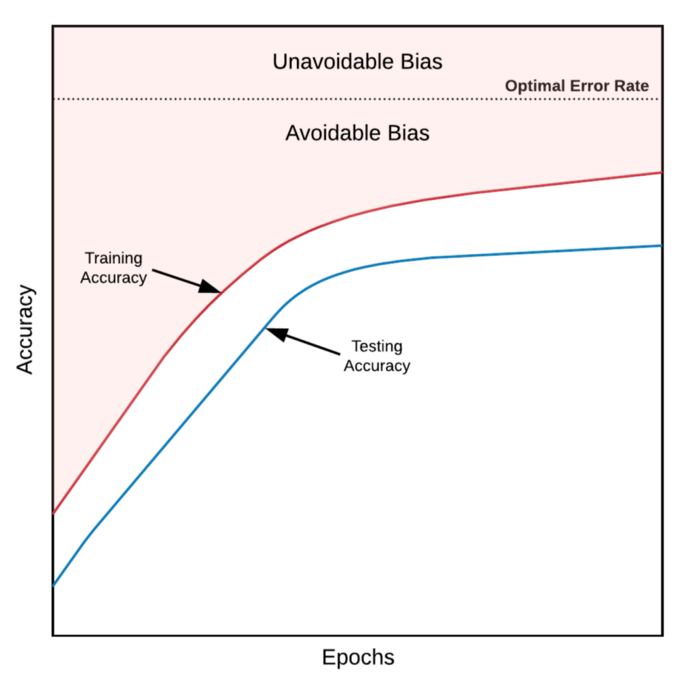

#### Techniques for reducing avoidable bias

1. Increase the model size
2. Modify input features
3. Reduce or eliminate regularization
4. Modify model architecture


#### Techniques for reducing variance 

1. Add more training data
2. Add regularization
3. Add early stopping
4. Reduce input features
5. Decrease the model size